<a href="https://colab.research.google.com/github/dekeu/Titanic_portfolio/blob/main/Stock_Price_Apple_Time_Series_Using_HMM_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [ ]:
apple_dataset = pd.read_csv("./Data/Apple.csv")

In [ ]:
apple_dataset.head(200)

,Date,Open,High,Low,Close,Volume
0,02/01/2015 16:00:00,27.85,27.86,26.84,27.33,53204626
1,05/01/2015 16:00:00,27.07,27.16,26.35,26.56,64285491
2,06/01/2015 16:00:00,26.64,26.86,26.16,26.57,65797116
3,07/01/2015 16:00:00,26.80,27.05,26.67,26.94,40105934
4,08/01/2015 16:00:00,27.31,28.04,27.18,27.97,59364547
...,...,...,...,...,...,...
195,12/10/2015 16:00:00,28.18,28.19,27.86,27.90,30467204
196,13/10/2015 16:00:00,27.71,28.11,27.67,27.95,33049256
197,14/10/2015 16:00:00,27.82,27.88,27.39,27.55,44462449
198,15/10/2015 16:00:00,27.73,28.03,27.62,27.97,37673452


In [ ]:
apple_dataset.tail(200)

,Date,Open,High,Low,Close,Volume
1814,17/03/2022 16:00:00,158.61,161.00,157.63,160.62,75615376
1815,18/03/2022 16:00:00,160.51,164.48,159.76,163.98,123511692
1816,21/03/2022 16:00:00,163.51,166.35,163.01,165.38,95811352
1817,22/03/2022 16:00:00,165.51,169.42,164.91,168.82,81532007
1818,23/03/2022 16:00:00,167.99,172.64,167.65,170.21,98062674
...,...,...,...,...,...,...
2009,23/12/2022 16:00:00,130.92,132.42,129.64,131.86,63814893
2010,27/12/2022 16:00:00,131.38,131.41,128.72,130.03,69007830
2011,28/12/2022 16:00:00,129.67,131.03,125.87,126.04,85438391
2012,29/12/2022 16:00:00,127.99,130.48,127.73,129.61,75703710


In [ ]:
apple_dataset.describe()

,Open,High,Low,Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,72.996569,73.831927,72.183083,73.038813,5.392450e+07
std,48.952461,49.604508,48.304438,48.975711,3.633099e+07
min,22.500000,22.920000,22.370000,22.590000,1.643460e+05
25%,32.327500,32.640000,32.080000,32.347500,2.720308e+07
50%,48.045000,48.585000,47.775000,48.170000,4.102539e+07
75%,123.727500,125.130000,122.192500,123.697500,7.340737e+07
max,182.630000,182.940000,179.120000,182.010000,3.326072e+08


In [ ]:
apple_dataset.shape

(2014, 6)

In [ ]:
apple_dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
apple_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2014 non-null   object 
 1   Open    2014 non-null   float64
 2   High    2014 non-null   float64
 3   Low     2014 non-null   float64
 4   Close   2014 non-null   float64
 5   Volume  2014 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 94.5+ KB


In [ ]:
apple_dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
apple_dataset.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
missing = apple_dataset.isnull().sum()
print('Percentage of observations missing data: {}{}'.format((round(100 * missing / len(apple_dataset), 2)), '%'))

Percentage of observations missing data: Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64%


In [ ]:
apple_dataset.duplicated().sum()

0

In [ ]:
apple_dataset.nunique()

Date      2014
Open      1734
High      1738
Low       1753
Close     1745
Volume    2014
dtype: int64

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>]],
      dtype=object)

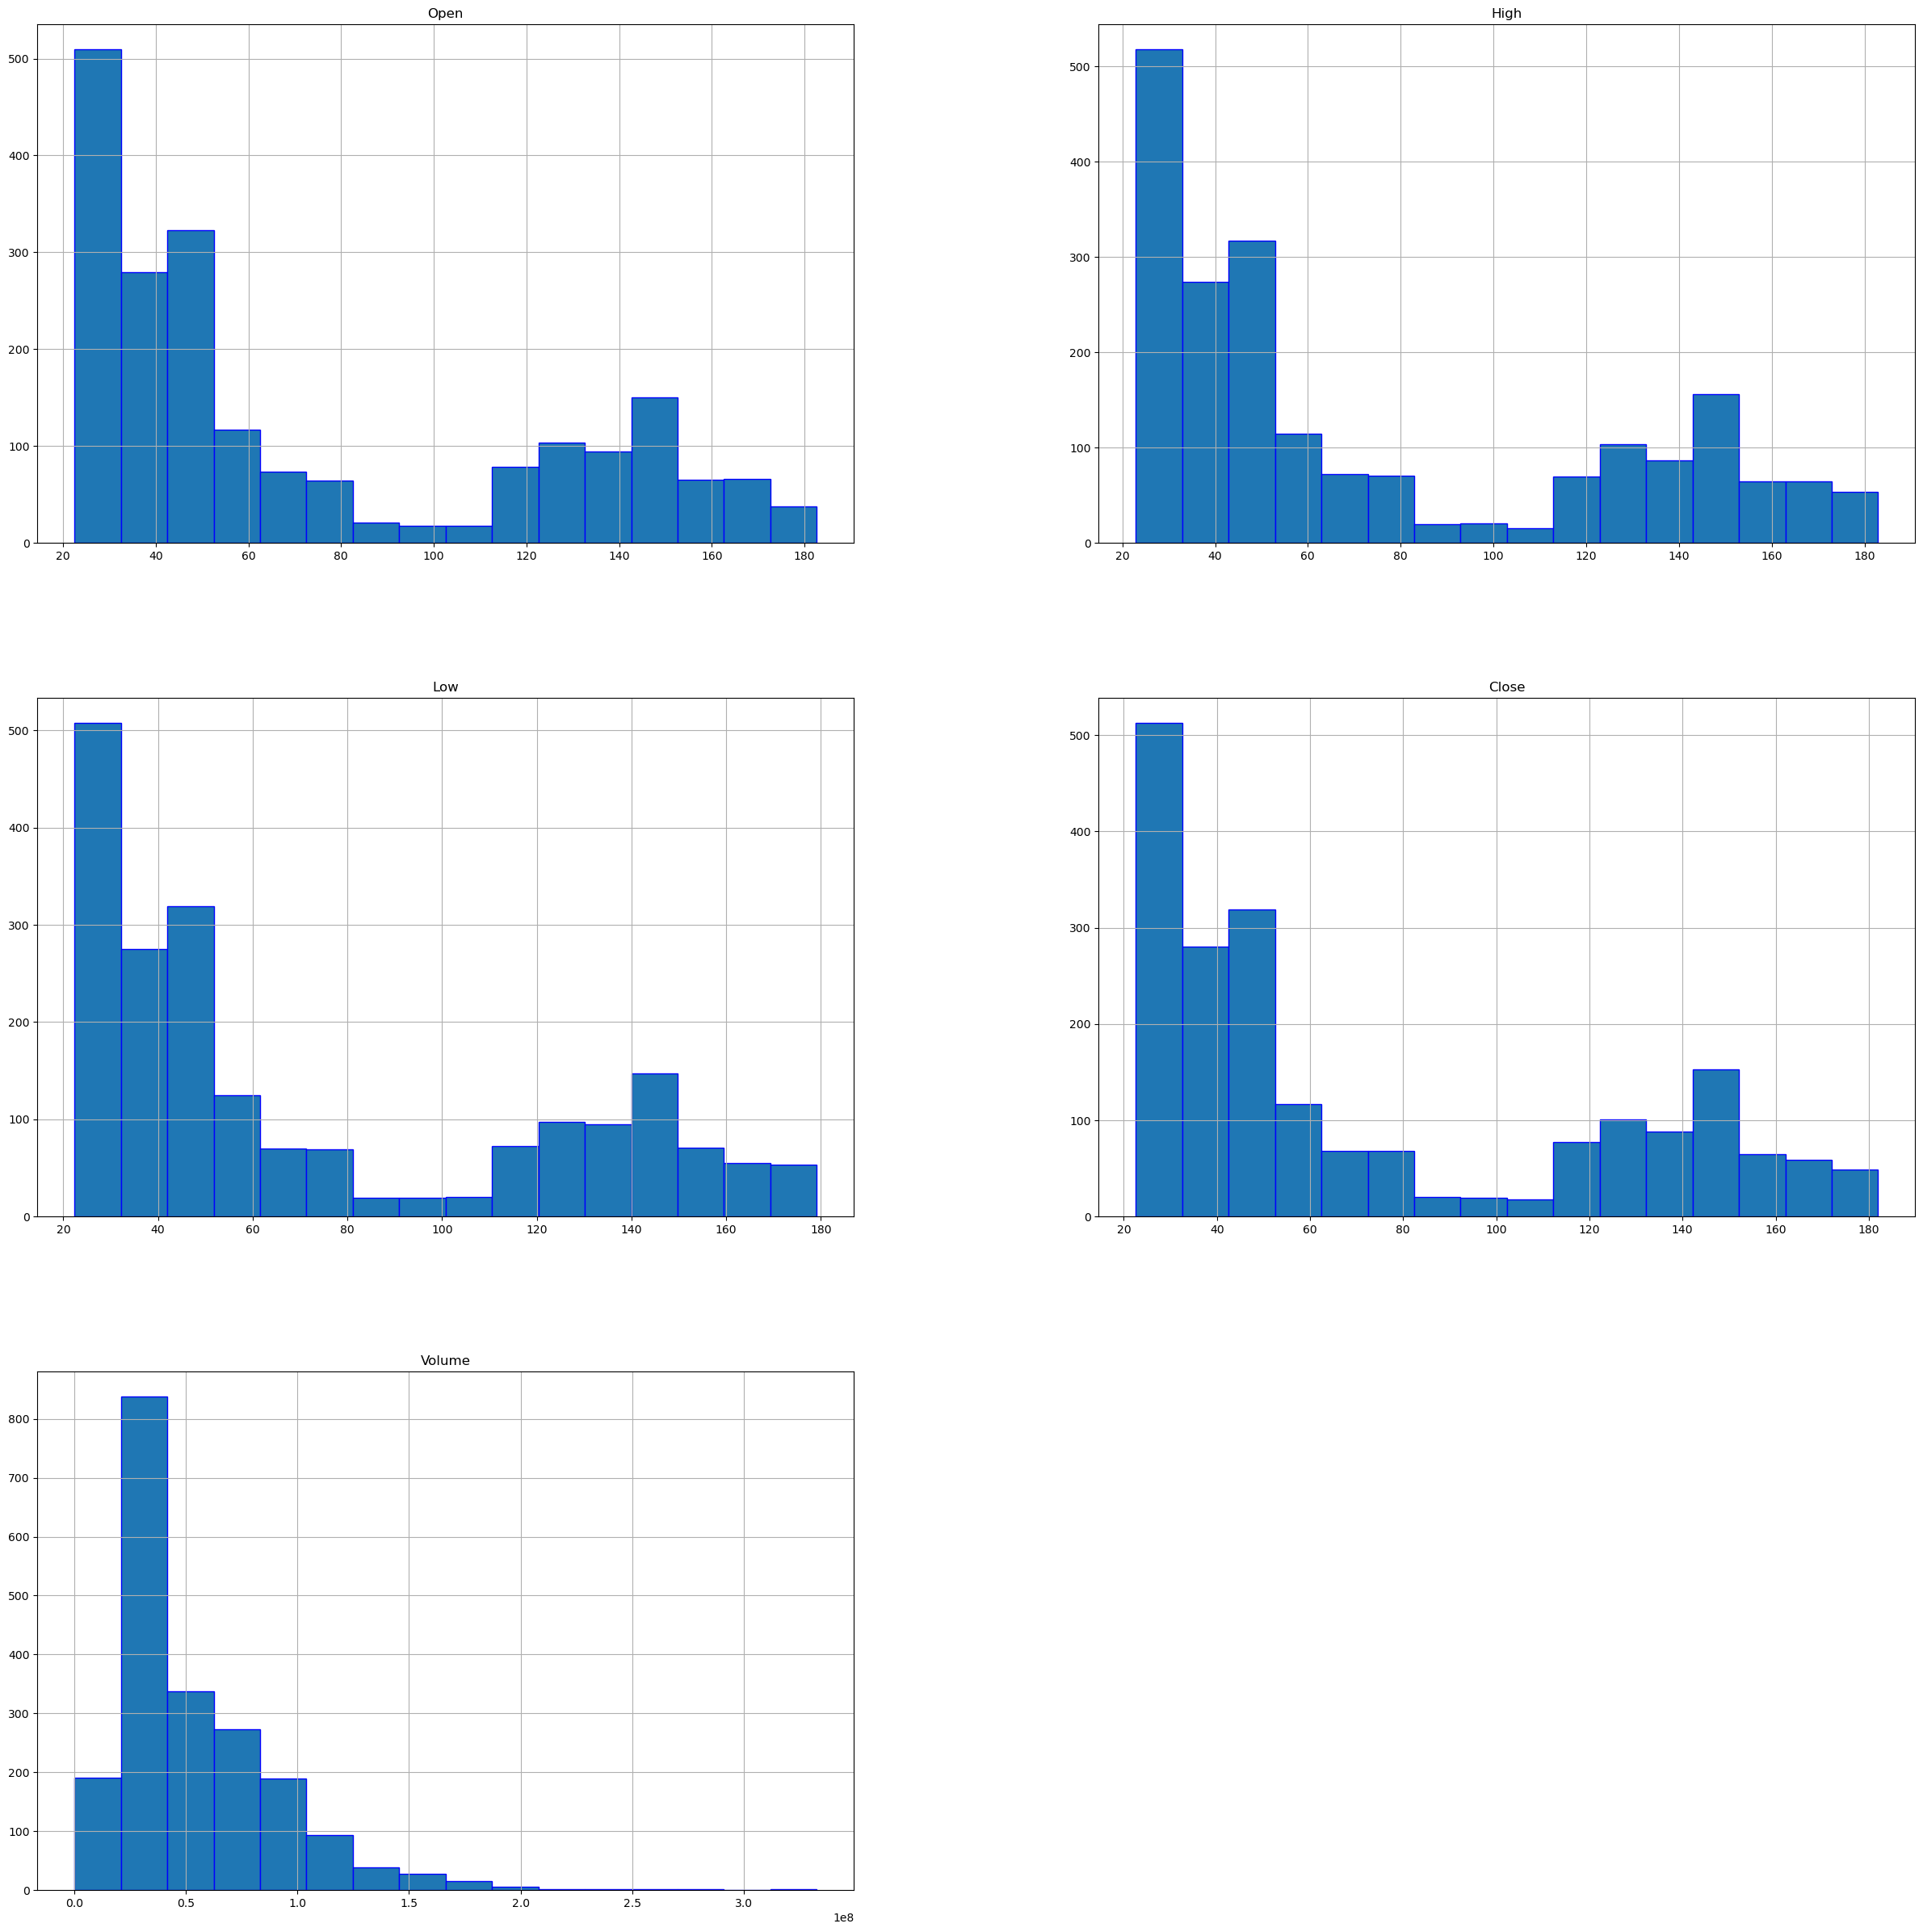

In [ ]:
apple_dataset.hist(edgecolor = 'blue', bins=16, figsize=(30,30))

<AxesSubplot:>

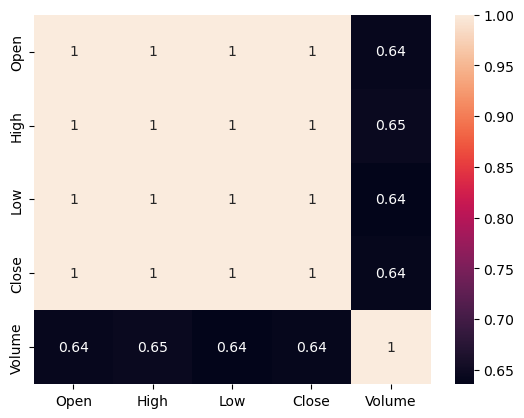

In [ ]:
sns.heatmap(apple_dataset.corr(), annot = True)

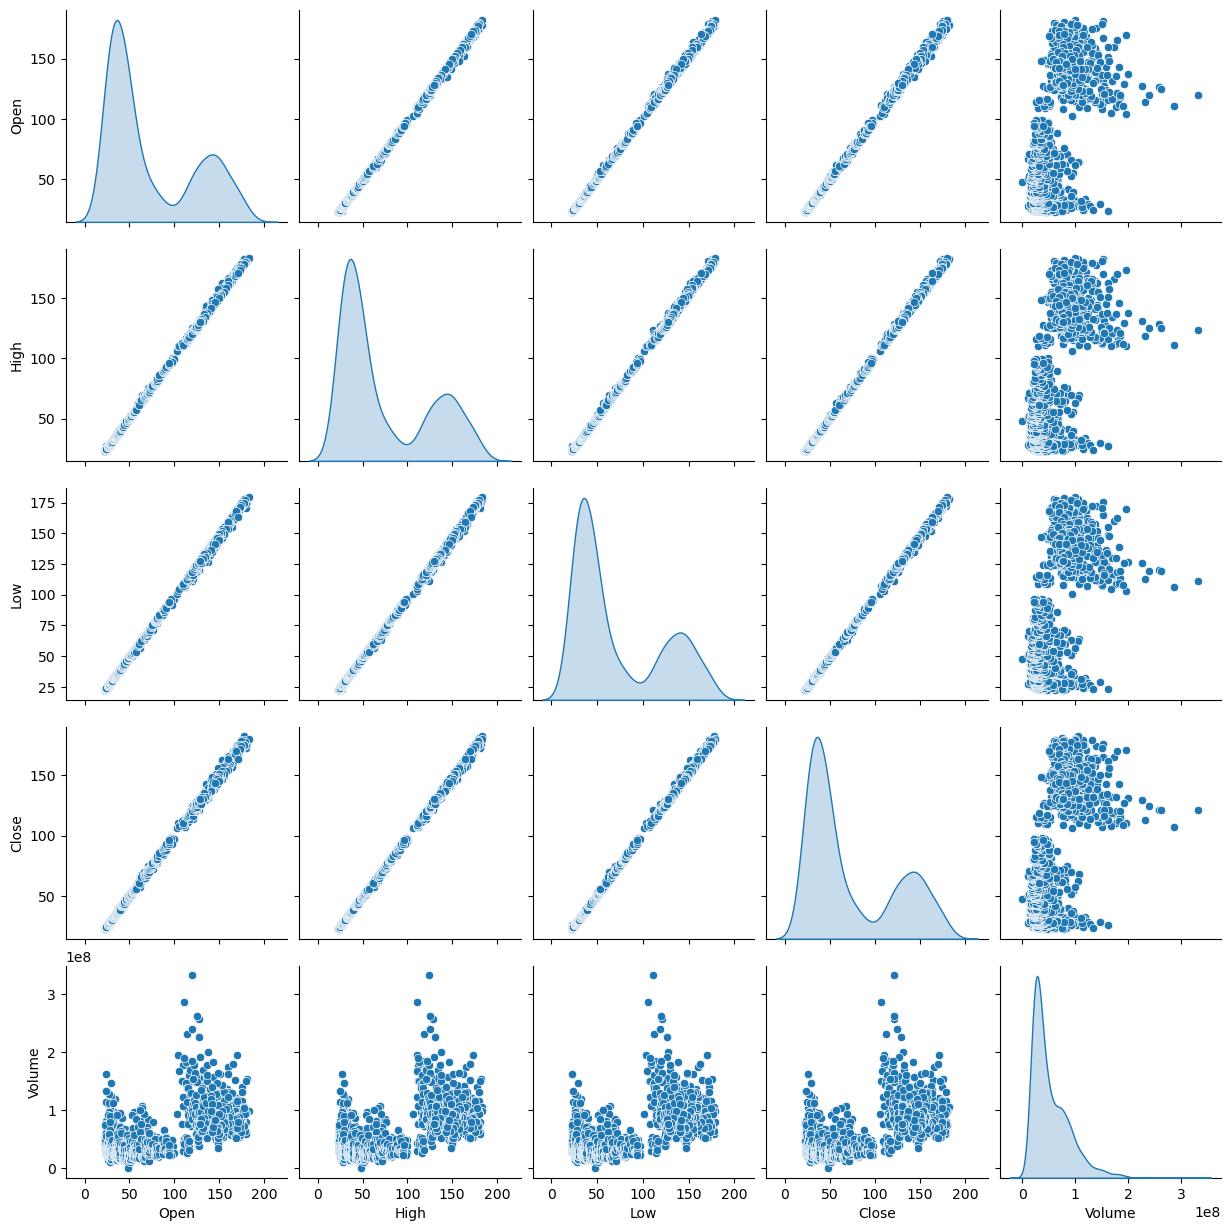

In [ ]:
sns.pairplot(data=apple_dataset, diag_kind='kde')

Mengubah index menjadi date, karena fokus permasalahan adalah time series dan melakukan perubahan terhadap data tipe

In [ ]:
apple_dataset['Date'] =pd.to_datetime(apple_dataset['Date']).dt.normalize()
apple_dataset.index= apple_dataset['Date']
apple_dataset = apple_dataset.sort_index(ascending=True)

In [ ]:
apple_dataset

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-04,2015-01-04,31.21,31.28,30.78,31.06,40621437
2015-01-05,2015-01-05,31.53,32.53,31.33,32.24,58512638
2015-01-06,2015-01-06,32.80,32.85,32.51,32.63,32112797
2015-01-07,2015-01-07,31.73,31.74,31.50,31.65,30238811
2015-01-09,2015-01-09,27.54,27.97,26.84,26.93,76845860
...,...,...,...,...,...,...
2022-12-23,2022-12-23,130.92,132.42,129.64,131.86,63814893
2022-12-27,2022-12-27,131.38,131.41,128.72,130.03,69007830
2022-12-28,2022-12-28,129.67,131.03,125.87,126.04,85438391


In [ ]:
apple_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2014 non-null   datetime64[ns]
 1   Open    2014 non-null   float64       
 2   High    2014 non-null   float64       
 3   Low     2014 non-null   float64       
 4   Close   2014 non-null   float64       
 5   Volume  2014 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 110.1 KB


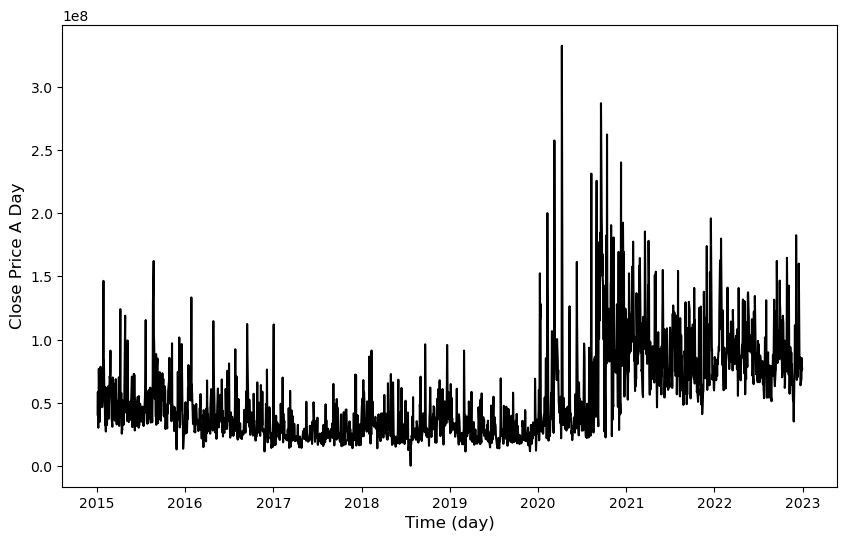

In [ ]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel('Close Price A Day', {'fontsize': 12})

timeseries(apple_dataset.index, apple_dataset['Volume'], 'Time (day)')

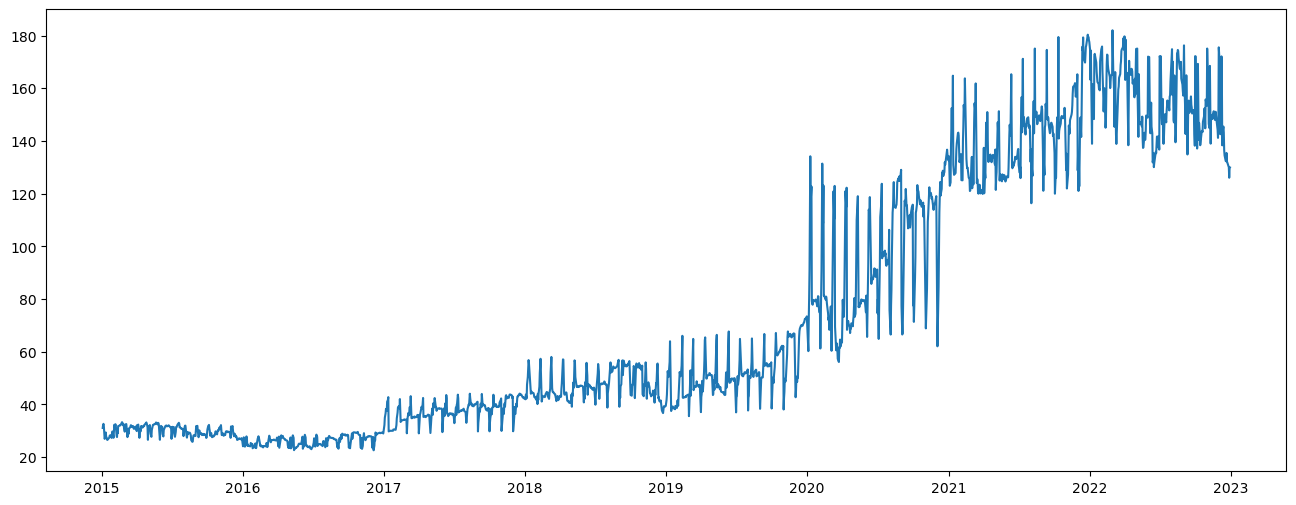

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(apple_dataset['Close'])
plt.show()

<Figure size 640x480 with 0 Axes>

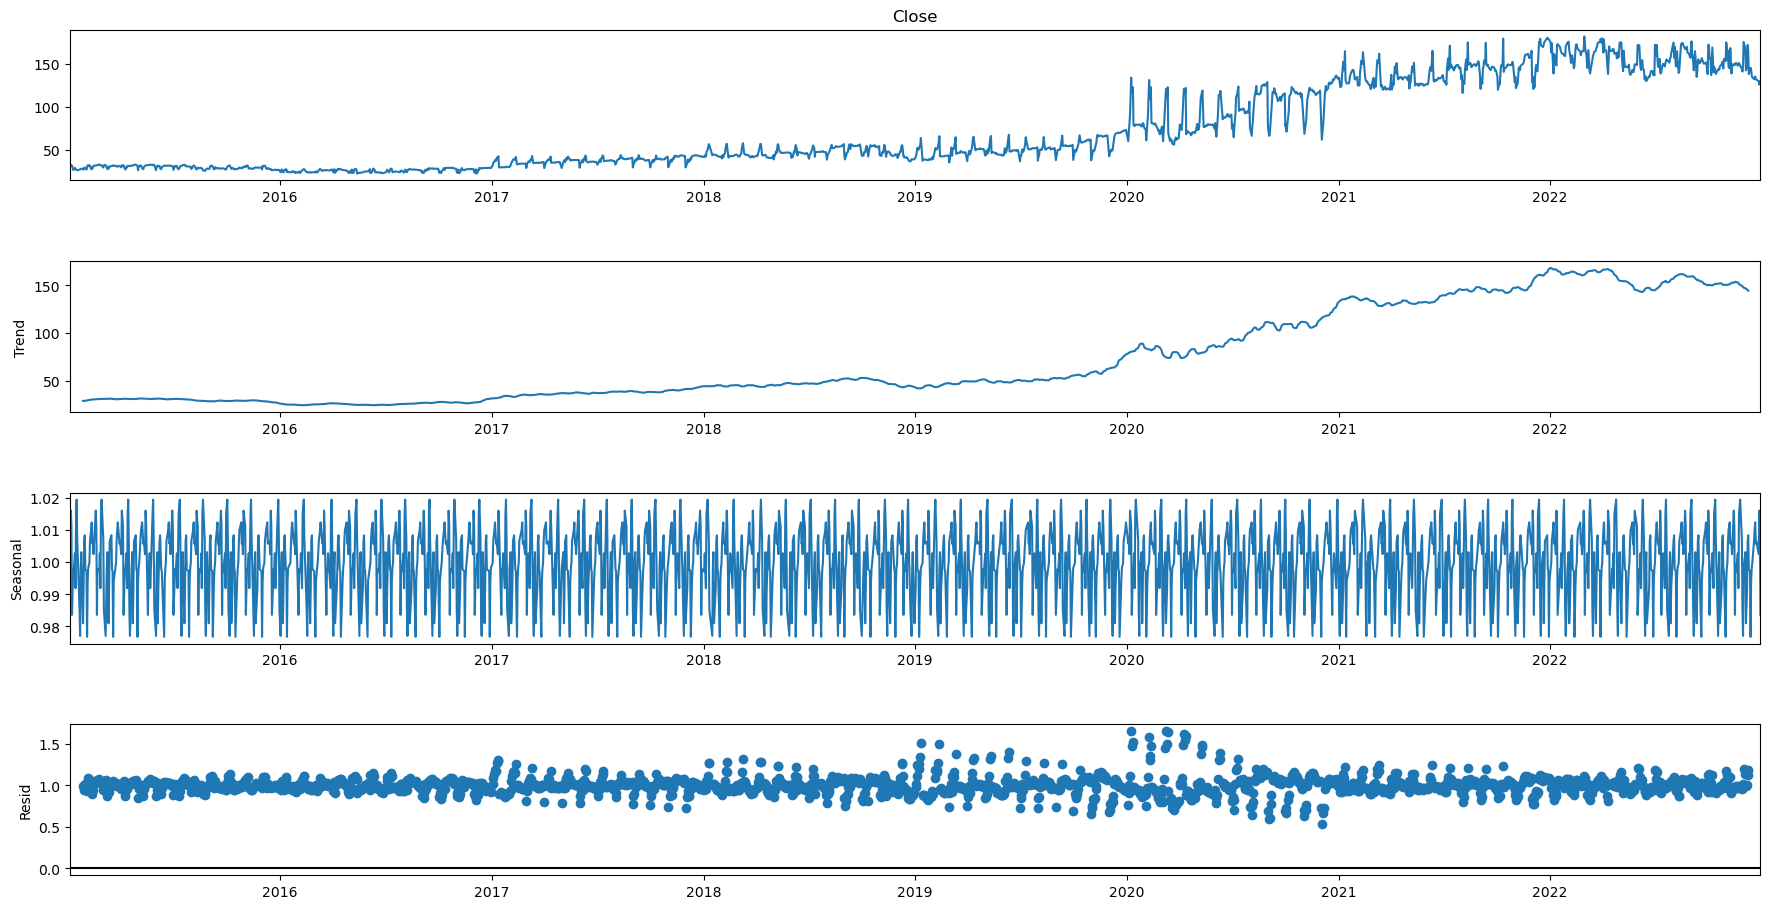

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apple_dataset['Close'], model='multiplicative', period=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(20, 10)

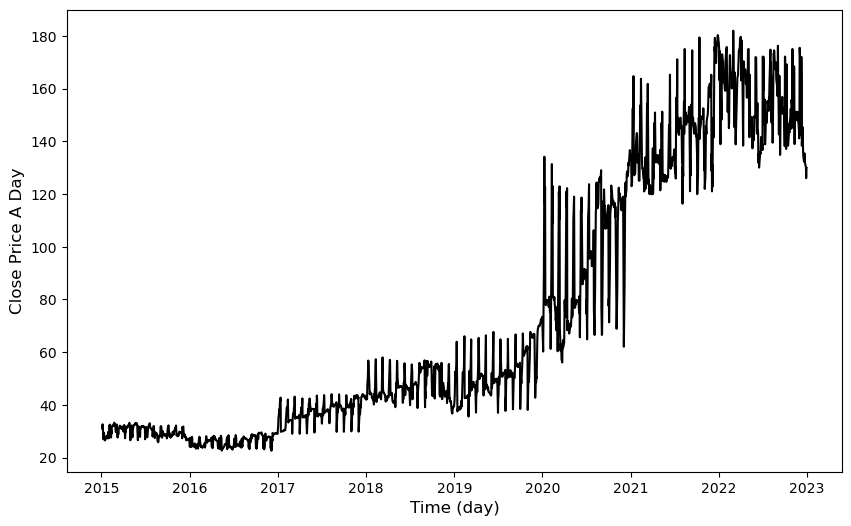

In [ ]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel('Close Price A Day', {'fontsize': 12})

timeseries(apple_dataset.index, apple_dataset['Close'], 'Time (day)')

## Data re-scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
input_apple_scale = MinMaxScaler(feature_range=(0, 1))
input_apple_scale = input_apple_scale.fit_transform(apple_dataset[['Low', 'High','Open', 'Volume']])
input_apple_scale =pd.DataFrame(input_apple_scale)
X = input_apple_scale

In [ ]:
output_apple_scale = MinMaxScaler(feature_range=(0, 1))
output_apple_scale = output_apple_scale.fit_transform(apple_dataset[['Close']])
output_apple_scale =pd.DataFrame(output_apple_scale)
y = output_apple_scale

In [ ]:
X

,0,1,2,3
0,0.053652,0.052243,0.054393,0.121696
1,0.057161,0.060055,0.056392,0.175514
2,0.064689,0.062055,0.064323,0.096102
3,0.058246,0.055118,0.057641,0.090465
4,0.028517,0.031559,0.031474,0.230661
...,...,...,...,...
2009,0.684338,0.684289,0.677075,0.191463
2010,0.678469,0.677978,0.679948,0.207084
2011,0.660287,0.675603,0.669269,0.256507
2012,0.672153,0.672166,0.658777,0.227225


In [ ]:
y

,0
0,0.053130
1,0.060532
2,0.062978
3,0.056831
4,0.027224
...,...
2009,0.685422
2010,0.673943
2011,0.648915
2012,0.671308


In [ ]:
y.rename(columns={0:'Apple Close Price'}, inplace= True)
y.index=apple_dataset.index

X.rename(columns={0:'Low', 1:'High', 2:'Open', 3:'Volume'}, inplace=True)
X = pd.DataFrame(X)
X.index=apple_dataset.index

In [ ]:
X

,Low,High,Open,Volume
Date,,,,
2015-01-04,0.053652,0.052243,0.054393,0.121696
2015-01-05,0.057161,0.060055,0.056392,0.175514
2015-01-06,0.064689,0.062055,0.064323,0.096102
2015-01-07,0.058246,0.055118,0.057641,0.090465
2015-01-09,0.028517,0.031559,0.031474,0.230661
...,...,...,...,...
2022-12-23,0.684338,0.684289,0.677075,0.191463
2022-12-27,0.678469,0.677978,0.679948,0.207084
2022-12-28,0.660287,0.675603,0.669269,0.256507


In [ ]:
y

,Apple Close Price
Date,
2015-01-04,0.053130
2015-01-05,0.060532
2015-01-06,0.062978
2015-01-07,0.056831
2015-01-09,0.027224
...,...
2022-12-23,0.685422
2022-12-27,0.673943
2022-12-28,0.648915


# Modelling Using HMM

In [ ]:
import numpy as np
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

In [ ]:
train_size_apple = int(len(apple_dataset) *0.80)
test_size_apple = int(len(apple_dataset)) - train_size_apple
print(test_size_apple)

403


In [ ]:
X_train = X[X.index < '2021-01-01']
Y_train = y[y.index < '2021-01-01']
X_test = X[X.index >= '2021-01-01']
Y_test = y[y.index >= '2021-01-01']

In [ ]:
# X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 1)

In [ ]:
X_train

,Low,High,Open,Volume
Date,,,,
2015-01-04,0.053652,0.052243,0.054393,0.121696
2015-01-05,0.057161,0.060055,0.056392,0.175514
2015-01-06,0.064689,0.062055,0.064323,0.096102
2015-01-07,0.058246,0.055118,0.057641,0.090465
2015-01-09,0.028517,0.031559,0.031474,0.230661
...,...,...,...,...
2020-12-24,0.693652,0.690789,0.679573,0.164737
2020-12-28,0.709027,0.715036,0.696247,0.373965
2020-12-29,0.714322,0.724097,0.721601,0.363620


In [ ]:
X_test

,Low,High,Open,Volume
Date,,,,
2021-01-02,0.692568,0.702787,0.694748,0.319079
2021-01-03,0.640638,0.656230,0.632299,0.349364
2021-01-04,0.638724,0.632796,0.631737,0.225376
2021-01-06,0.647974,0.640107,0.640605,0.202961
2021-01-07,0.723381,0.714973,0.712546,0.157385
...,...,...,...,...
2022-12-23,0.684338,0.684289,0.677075,0.191463
2022-12-27,0.678469,0.677978,0.679948,0.207084
2022-12-28,0.660287,0.675603,0.669269,0.256507


In [ ]:
Y_train

,Apple Close Price
Date,
2015-01-04,0.053130
2015-01-05,0.060532
2015-01-06,0.062978
2015-01-07,0.056831
2015-01-09,0.027224
...,...
2020-12-24,0.686112
2020-12-28,0.715719
2020-12-29,0.704303


In [ ]:
Y_test

,Apple Close Price
Date,
2021-01-02,0.699724
2021-01-03,0.659892
2021-01-04,0.629846
2021-01-06,0.637875
2021-01-07,0.719358
...,...
2022-12-23,0.685422
2022-12-27,0.673943
2022-12-28,0.648915


In [ ]:
from hmmlearn import hmm
import itertools
from tqdm import tqdm

In [ ]:
class HMMStockPricePredictor:
    def __init__(self, company, test_size=0.2,
                 _hidden_states=4, _latenc_day=10,
                 _frac_change_step =50, _frac_high_step=10,
                 _frac_low_step=10):

        self.company = company
        self._latenc_day = _latenc_day
        self.hmm = hmm.GaussianHMM(n_components=_hidden_states)
        self._train_and_test_split(test_size)
        self._compute_all_possible_outcomes(
            _frac_change_step, _frac_high_step, _frac_low_step)


    def _train_and_test_split(self, test_size):
        _train_data, test_data = train_test_split(
            apple_dataset, test_size=test_size, shuffle=False)

        self._train_data = apple_dataset[apple_dataset['Date'] < '2021-01-01']
        self._test_data = apple_dataset[apple_dataset['Date'] >= '2021-01-01']

    @staticmethod
    def _features_representation(data):
        open_price = np.array(data['Open'])
        close_price = np.array(data['Close'])
        high_price = np.array(data['High'])
        low_price = np.array(data['Low'])

        frac_change = (close_price - open_price) / open_price
        frac_high = (high_price - open_price) / open_price
        frac_low = (open_price - low_price) / open_price

        return np.column_stack((frac_change, frac_high, frac_low))

    def fit(self):
        model_feature_representation = HMMStockPricePredictor._features_representation(self._train_data)
        self.hmm.fit(model_feature_representation)

    def _compute_all_possible_outcomes(self, _frac_change_step,
                                       _frac_high_step, _frac_low_step):

        frac_change_range = np.linspace(-0.1, 0.1, _frac_change_step)
        frac_high_range = np.linspace(0, 0.1, _frac_high_step)
        frac_low_range = np.linspace(0, 0.1, _frac_low_step)

        self._possible_outcomes = np.array(list(itertools.product(
            frac_change_range, frac_high_range, frac_low_range)))

    def _get_most_probable_outcome(self, day_index):
        previous_data_start_index = max(0, day_index - self._latenc_day)
        previous_data_end_index = max(0, day_index - 1)
        previous_data = self._test_data.iloc[previous_data_end_index: previous_data_start_index]
        previous_data_features = HMMStockPricePredictor._features_representation(
            previous_data)

        outcome_score = []
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack(
                (previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))
        most_probable_outcome = self._possible_outcomes[np.argmax(
            outcome_score)]

        return most_probable_outcome

    def predict_close_price(self, day_index):
        close_price = self._test_data.iloc[day_index]['Close']
        predicted_frac_change, _, _ = self._get_most_probable_outcome(
            day_index)
        return close_price * (1 + predicted_frac_change)

    def predict_close_prices_for_days(self, days, with_plot=False):
        predicted_close_prices = []
        for day_index in tqdm(range(days)):
            predicted_close_prices.append(self.predict_close_price(day_index))

        if with_plot:
            test_data = self._test_data[0: days]
            days = np.array(test_data['Date'], dtype="datetime64[ms]")
            actual_close_prices = test_data['Close']

            fig = plt.figure()

            axes = fig.add_subplot(111)
            axes.plot(days, actual_close_prices, 'bo-', label="actual")
            axes.plot(days, predicted_close_prices, 'r+-', label="predicted")
            axes.set_title('{company}'.format(company=self.company))

            fig.autofmt_xdate()

            plt.legend()
            plt.show()

        return predicted_close_prices, actual_close_prices

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [09:43<00:00,  1.16s/it]


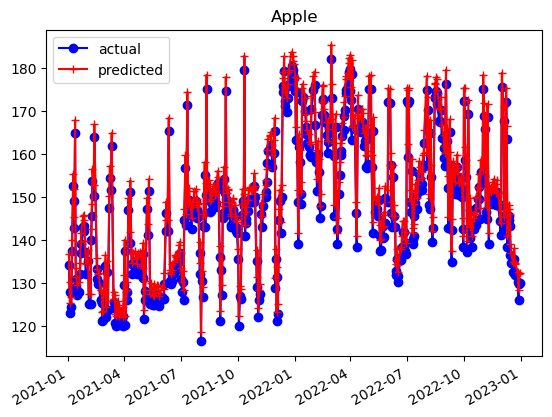

In [ ]:
apple_stock_price_predictor = HMMStockPricePredictor('Apple')
apple_stock_price_predictor.fit()
pred, actual = apple_stock_price_predictor.predict_close_prices_for_days(len(Y_test), with_plot=True)


In [ ]:
print(pred)

[136.60379591836733, 130.13716326530613, 125.2591836734694, 126.56269387755103, 139.79128571428572, 155.31120408163264, 145.27010204081634, 151.696, 167.79638775510205, 133.2941020408163, 131.27773469387753, 129.47522448979592, 130.17789795918367, 134.45504081632654, 139.38393877551022, 141.62434693877552, 145.54506122448979, 145.7894693877551, 144.66926530612244, 139.60797959183674, 134.38375510204082, 137.4694081632653, 127.4181224489796, 127.35702040816327, 142.53069387755102, 148.19281632653062, 156.47214285714287, 152.77546938775512, 166.76783673469387, 135.63634693877552, 133.2431836734694, 132.09242857142857, 132.25536734693878, 128.31428571428572, 128.17171428571427, 127.65234693877551, 123.21226530612245, 123.48722448979592, 136.4001224489796, 124.30191836734694, 134.9744081632653, 125.80910204081633, 150.06661224489798, 157.13408163265308, 154.2724693877551, 164.81257142857143, 126.26736734693877, 127.87638775510203, 127.05151020408164, 122.74381632653062, 122.19389795918367,

In [ ]:
type(pred)

list

In [ ]:
pred_df = pd.DataFrame(pred)

In [ ]:
pred_df

,0
0,136.603796
1,130.137163
2,125.259184
3,126.562694
4,139.791286
...,...
498,134.281918
499,132.418306
500,128.355020
501,131.990592


In [ ]:
actual_df = pd.DataFrame(actual)

In [ ]:
actual_df

,Close
Date,
2021-01-02,134.14
2021-01-03,127.79
2021-01-04,123.00
2021-01-06,124.28
2021-01-07,137.27
...,...
2022-12-23,131.86
2022-12-27,130.03
2022-12-28,126.04


In [ ]:
pred_df['Actual'] = actual_df
pred_df.index = actual_df.index
pred_df['Actual'] = actual_df

In [ ]:
pred_df

,0,Actual
Date,,
2021-01-02,136.603796,134.14
2021-01-03,130.137163,127.79
2021-01-04,125.259184,123.00
2021-01-06,126.562694,124.28
2021-01-07,139.791286,137.27
...,...,...
2022-12-23,134.281918,131.86
2022-12-27,132.418306,130.03
2022-12-28,128.355020,126.04


In [ ]:
pred_df.rename(columns={0:'Prediction'}, inplace=True)
pred_df = pd.DataFrame(pred_df)

In [ ]:
pred_df

,Prediction,Actual
Date,,
2021-01-02,136.603796,134.14
2021-01-03,130.137163,127.79
2021-01-04,125.259184,123.00
2021-01-06,126.562694,124.28
2021-01-07,139.791286,137.27
...,...,...
2022-12-23,134.281918,131.86
2022-12-27,132.418306,130.03
2022-12-28,128.355020,126.04


In [ ]:
# pred_df.to_csv('HMM_Apple_Prediction_with_New_Split_Method.csv', index=False)

In [ ]:
apple_dataset_pred = pd.read_csv("./Data/HMM_Apple_Prediction_with_New_Split_Method.csv")

In [ ]:
apple_dataset_pred

,Prediction,Actual
0,136.603796,134.14
1,130.137163,127.79
2,125.259184,123.00
3,126.562694,124.28
4,139.791286,137.27
...,...,...
498,134.281918,131.86
499,132.418306,130.03
500,128.355020,126.04
501,131.990592,129.61


<AxesSubplot:xlabel='Date'>

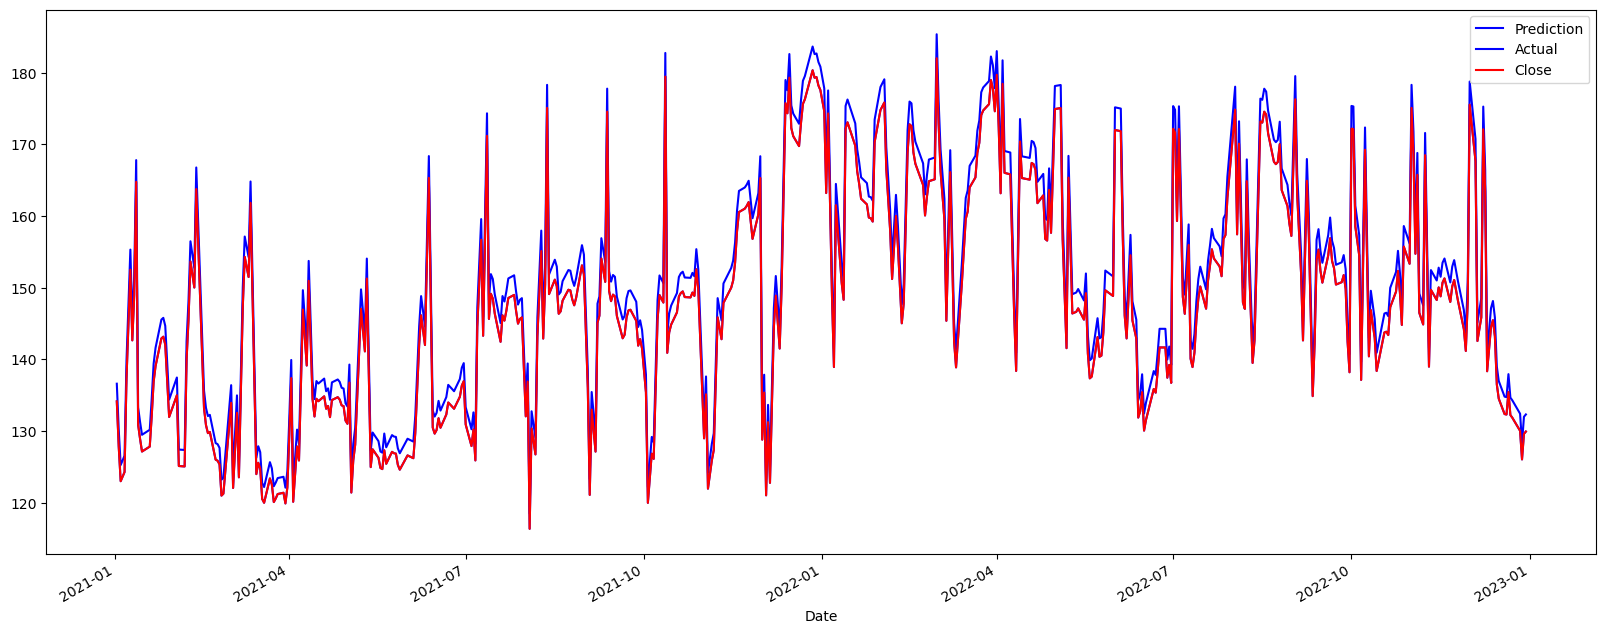

In [ ]:
pred_df.plot(figsize=(20,8), legend=True, color='blue')
test_data['Close'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def MAPE(actual_value, predict_value):
    actual_value, predict_value = np.array(actual_value), np.array(predict_value)
    return (np.fabs(actual_value - predict_value)/actual_value).mean()

def evaluate_model(predict_value, actual_value):
    mae = mean_absolute_error(np.array(actual_value), np.array(predict_value))
    mse = mean_squared_error(actual_value, predict_value)
    mape = MAPE(predict_value, actual_value)
    rmse = sqrt(mean_squared_error(actual_value, predict_value))

    print("MAE Score= ", "{:.2f}".format(abs(mae)), "MAPE Score= ", "{:.2f}%".format(abs(mape)) \
         , "MSE Score= ", "{:.2f}%".format(abs(mse)), "RMSE Score= ", "{:.2f}%".format(abs(rmse)))

In [ ]:
evaluate_model(pred, actual)

MAE Score=  2.72 MAPE Score=  0.02% MSE Score=  7.46% RMSE Score=  2.73%
